link para a base de dados
https://archive.ics.uci.edu/ml/datasets/HTRU2

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.tree import export_text

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# https://stackoverflow.com/questions/46986398/import-data-into-google-colaboratory
# como acessar a pasta com os arquivos
# /content/drive/{caminho para a pasta/arquivo}
!ls "/content/drive/My Drive/USP - 2023/SCC0530 - IA/Trabalho 3/pythonProject"

 HTRU_2.csv  'identificação de pulsares.ipynb'	 Relatório.gdoc   tree_plot.png


In [ ]:
#https://drive.google.com/file/d/1ckQf1UFIvoaMeeP4ZqTIadvNdJuOHaZB/view?usp=share_link
# alterar o path de acordo com seu drive
# path do arquivo HTRU_2.csv
file_path = file_path = "/content/drive/My Drive/USP - 2023/SCC0530 - IA/Trabalho 3/pythonProject/HTRU_2.csv"

Atributos do dataset:
* Mean of the integrated profile
* Standard deviation of the integrated profile
* Excess kurtosis of the integrated profile
* Skewness of the integrated profile
* Mean of the DM-SNR curve
* Standard deviation of the DM-SNR curve
* Excess kurtosis of the DM-SNR curve
* Skewness of the DM-SNR curve
* Class



In [ ]:
headers = ["Mean_Profile", "Std_Profile", "Excess_Kurtosis_Profile", "Skewness_Profile",
           "Mean_DMSNR", "Std_DMSNR", "Excess_Kurtosis_DMSNR", "Skewness_DMSNR", "Class"]

# Carregar o conjunto de dados
data = pd.read_csv(file_path,names=headers)

# Verificar se há dados faltantes
#print(data.isnull().sum())

In [ ]:
data

,Mean_Profile,Std_Profile,Excess_Kurtosis_Profile,Skewness_Profile,Mean_DMSNR,Std_DMSNR,Excess_Kurtosis_DMSNR,Skewness_DMSNR,Class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0
...,...,...,...,...,...,...,...,...,...
17893,136.429688,59.847421,-0.187846,-0.738123,1.296823,12.166062,15.450260,285.931022,0
17894,122.554688,49.485605,0.127978,0.323061,16.409699,44.626893,2.945244,8.297092,0
17895,119.335938,59.935939,0.159363,-0.743025,21.430602,58.872000,2.499517,4.595173,0
17896,114.507812,53.902400,0.201161,-0.024789,1.946488,13.381731,10.007967,134.238910,0


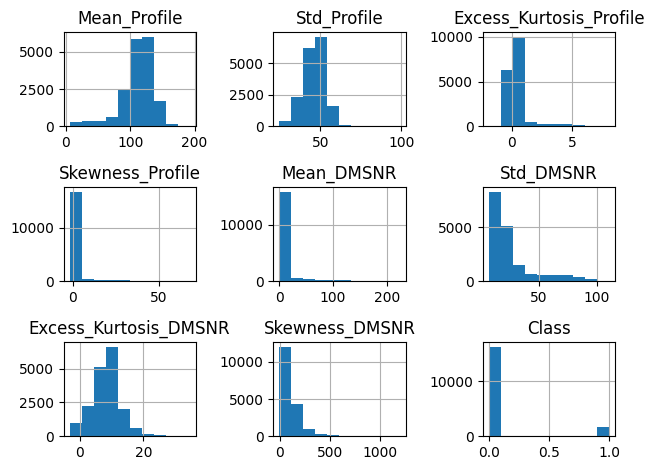

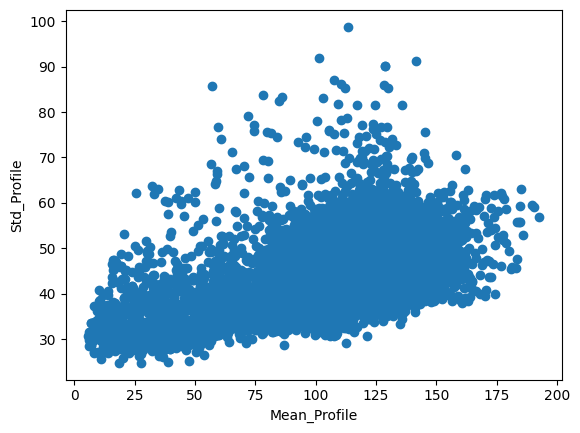

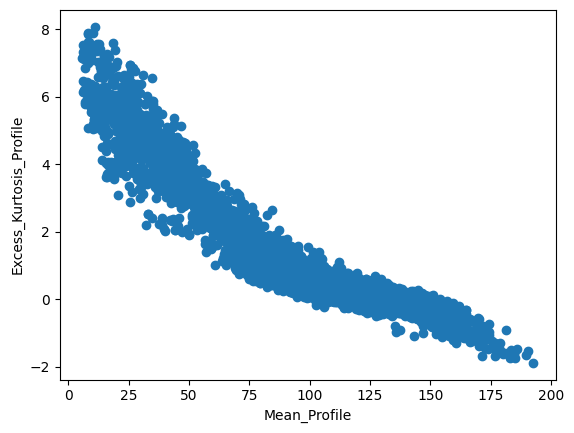

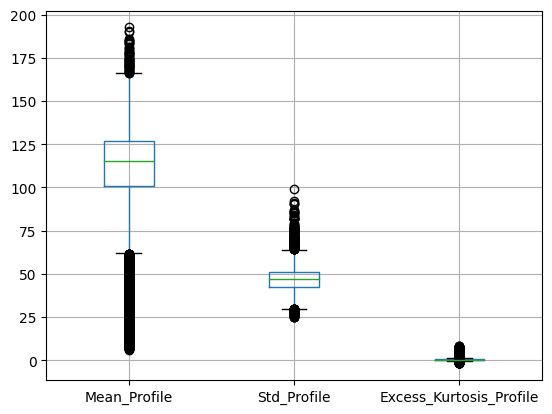

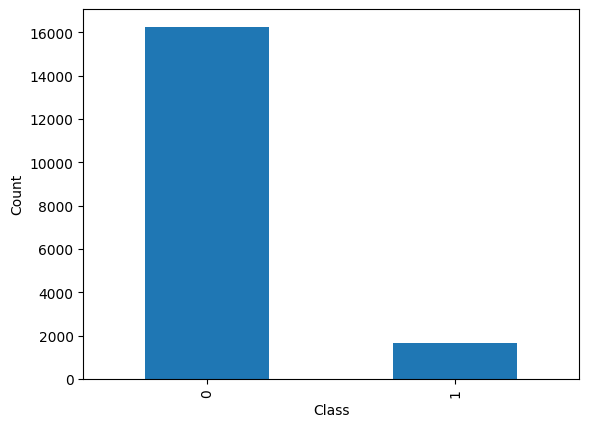

Text(0.5, 1.0, 'Correlation Matrix')

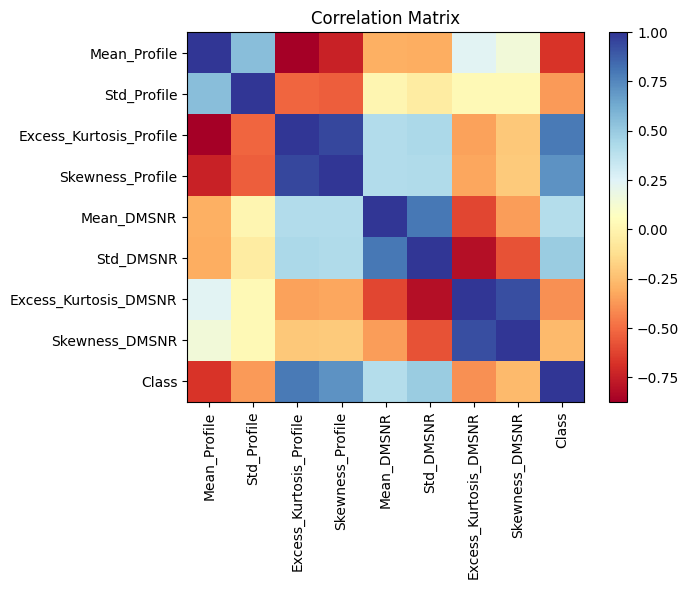

In [ ]:
# Histograma
data.hist()
plt.tight_layout()
plt.show()

# Gráficos de dispersão
plt.scatter(data['Mean_Profile'], data['Std_Profile'])
plt.xlabel('Mean_Profile')
plt.ylabel('Std_Profile')
plt.show()

plt.scatter(data['Mean_Profile'], data['Excess_Kurtosis_Profile'])
plt.xlabel('Mean_Profile')
plt.ylabel('Excess_Kurtosis_Profile')
plt.show()

# Box plot
data.boxplot(column=['Mean_Profile', 'Std_Profile', 'Excess_Kurtosis_Profile'])
plt.show()

# Gráfico de barras
data['Class'].value_counts().plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# Matriz de correlação
correlation_matrix = data.corr()
plt.imshow(correlation_matrix, cmap='RdYlBu', aspect='auto')
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation='vertical')
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title('Correlation Matrix')



In [ ]:
# Separar os atributos (variáveis independentes) e as classes (rótulos)
X = data.iloc[:, :-1]  # Atributos
y = data.iloc[:, -1]   # Classes

# Padronizar os atributos
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Dividir o conjunto de dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar os classificadores
knn = KNeighborsClassifier(n_neighbors=5)
nb = GaussianNB()
dt = DecisionTreeClassifier()
mlp = MLPClassifier()


In [ ]:

# Configuração das medidas de avaliação
evaluation_measures = {
    'Accuracy': make_scorer(accuracy_score),
}

# Validação cruzada
classifier_name = 'KNN'
classifier = knn
print(f"Classifier: {classifier_name}")
for measure_name, measure_func in evaluation_measures.items():
    accuracy_knn = cross_val_score(classifier, X, y, cv=10, scoring=measure_func)
    print(f"{measure_name}: {accuracy_knn.mean()} (Std: {accuracy_knn.std()})")
print()

classifier_name = 'Naive Bayes'
classifier = nb
print(f"Classifier: {classifier_name}")
for measure_name, measure_func in evaluation_measures.items():
    accuracy_nb = cross_val_score(nb, X, y, cv=10, scoring=measure_func)
    print(f"{measure_name}: {accuracy_nb.mean()} (Std: {accuracy_nb.std()})")
print()

classifier_name = 'Árvore de Decisão'
classifier = dt
print(f"Classifier: {classifier_name}")
for measure_name, measure_func in evaluation_measures.items():
    accuracy_dt = cross_val_score(dt, X, y, cv=10, scoring=measure_func)
    print(f"{measure_name}: {accuracy_dt.mean()} (Std: {accuracy_dt.std()})")
print()

classifier_name = 'Multilayer Perceptron'
classifier = mlp
print(f"Classifier: {classifier_name}")
for measure_name, measure_func in evaluation_measures.items():
    accuracy_mlp = cross_val_score(mlp, X, y, cv=10, scoring=measure_func)
    print(f"{measure_name}: {accuracy_mlp.mean()} (Std: {accuracy_mlp.std()})")
print()





Classifier: KNN
Accuracy: 0.9780420696309851 (Std: 0.004015871579805779)

Classifier: Naive Bayes
Accuracy: 0.9442417192589099 (Std: 0.020943853316848053)

Classifier: Árvore de Decisão
Accuracy: 0.9682648150866096 (Std: 0.0044681454987708)

Classifier: Multilayer Perceptron
Accuracy: 0.9795508867036608 (Std: 0.003517586398145978)



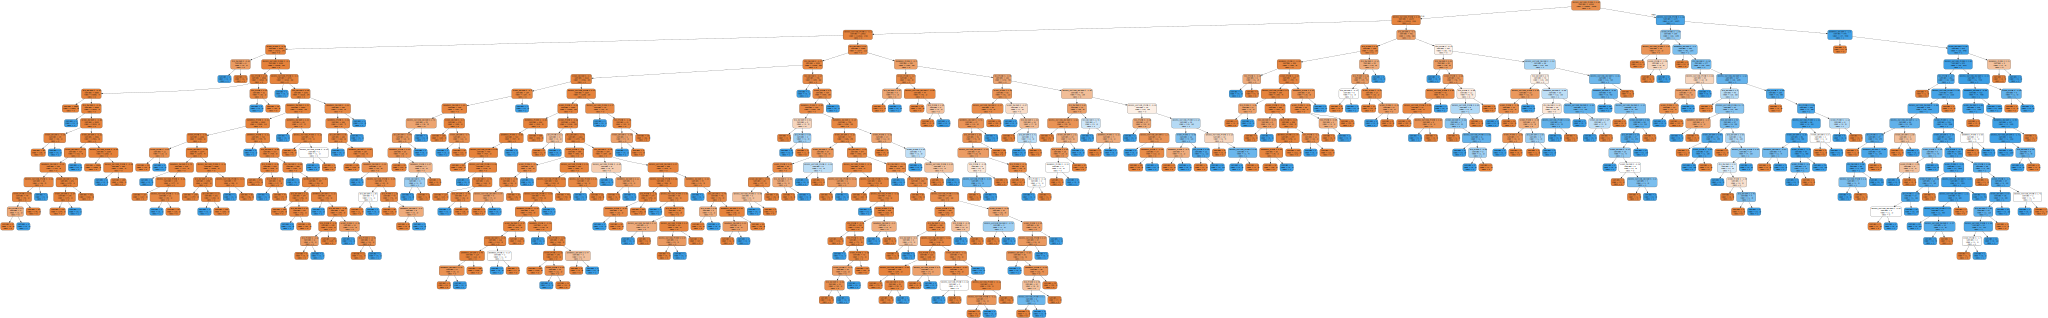

In [ ]:
import graphviz
from sklearn.tree import DecisionTreeClassifier, export_graphviz

# Treinar o classificador de árvore de decisão
dt.fit(X_train, y_train)

# Gerar a representação de texto da árvore de decisão
tree_text = export_text(dt, feature_names=headers[:-1], show_weights=True)

# Caminho do arquivo para salvar a imagem
image_path = '/content/drive/My Drive/USP - 2023/SCC0530 - IA/Trabalho 3/pythonProject/tree_plot.png'

dot_data = export_graphviz(dt, feature_names=headers[:-1], class_names=['0', '1'], filled=True, rounded=True,
                           special_characters=True, precision=2, proportion=False, impurity=False)
graph = graphviz.Source(dot_data)
graph.render('/content/drive/My Drive/USP - 2023/SCC0530 - IA/Trabalho 3/pythonProject/tree_plot', format='png', cleanup=True)

# Exibir a imagem do plot simplificado da árvore de decisão
graph


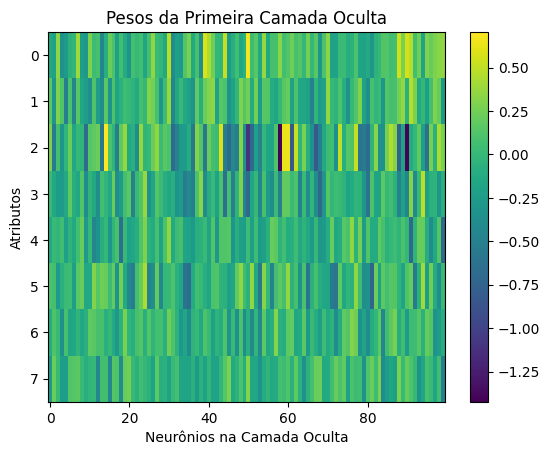

In [ ]:
# Treinar o classificador MLP
mlp.fit(X_train, y_train)

# Acessar os pesos da primeira camada oculta
weights_hidden = mlp.coefs_[0]

# Plotar os pesos em um mapa de calor
plt.imshow(weights_hidden, cmap='viridis', aspect='auto')
plt.colorbar()
plt.xlabel('Neurônios na Camada Oculta')
plt.ylabel('Atributos')
plt.title('Pesos da Primeira Camada Oculta')
plt.show()

Probabilidade a priori das classes:
[0.90794804 0.09205196]
Probabilidade condicional dos atributos (médias):
[[0.21423578 0.11392948 0.25125791 0.22508688 0.12809731 0.16062843
  0.13022893 0.0899958 ]
 [2.1122411  1.13926266 2.47644118 2.21237997 1.2741988  1.55659756
  1.22698197 0.8112227 ]]
Classes previstas:
[0 1 0 ... 0 0 1]


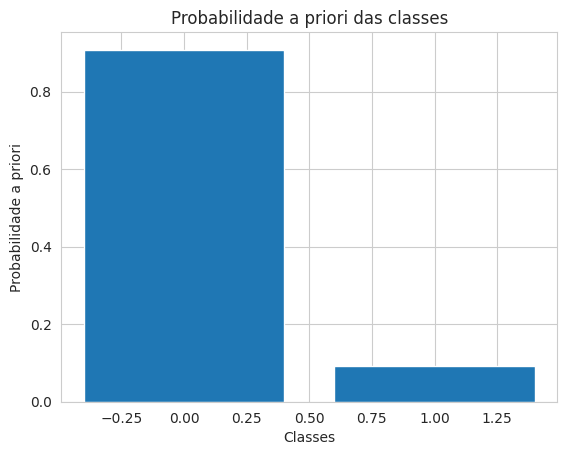

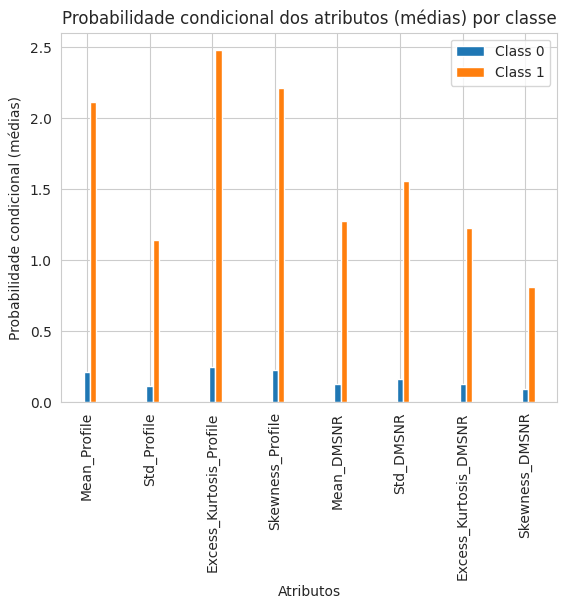

In [ ]:
import numpy as np
nb.fit(X_train, y_train)

# Probabilidade a priori das classes
class_priors = nb.class_prior_
print("Probabilidade a priori das classes:")
print(class_priors)

# Probabilidade condicional dos atributos (médias)
attribute_means = nb.theta_
print("Probabilidade condicional dos atributos (médias):")
print(abs(attribute_means))

# Previsões do classificador
y_pred = nb.predict(X_test)
print("Classes previstas:")
print(y_pred)

# Probabilidade a priori das classes
class_priors = nb.class_prior_
classes = np.unique(y_train)
plt.bar(classes, class_priors)
plt.xlabel('Classes')
plt.ylabel('Probabilidade a priori')
plt.title('Probabilidade a priori das classes')
plt.show()

# Probabilidade condicional dos atributos (médias)
attribute_means = nb.theta_
n_attributes = len(attribute_means[0])
x = np.arange(n_attributes)
for i, class_label in enumerate(classes):
    plt.bar(x + i * 0.1, abs(attribute_means[i]), width=0.1, label=f'Class {class_label}')
plt.xticks(x, headers[:-1], rotation='vertical')
plt.xlabel('Atributos')
plt.ylabel('Probabilidade condicional (médias)')
plt.title('Probabilidade condicional dos atributos (médias) por classe')
plt.legend()
plt.show()

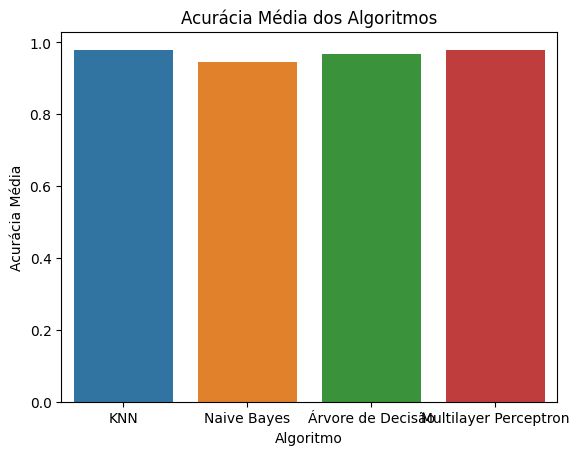

In [ ]:
# Plotar gráfico de barras das precisões médias
algorithms = ['KNN', 'Naive Bayes', 'Árvore de Decisão', 'Multilayer Perceptron']
accuracies = [accuracy_knn.mean(), accuracy_nb.mean(), accuracy_dt.mean(), accuracy_mlp.mean()]

sns.barplot(x=algorithms, y=accuracies)
sns.set_style('whitegrid')
plt.title('Acurácia Média dos Algoritmos')
plt.xlabel('Algoritmo')
plt.ylabel('Acurácia Média')
plt.show()

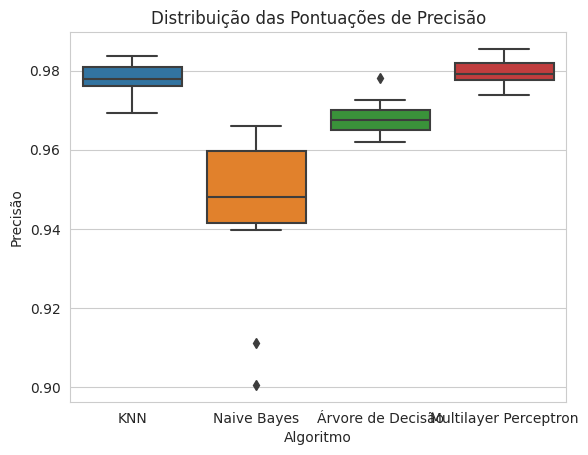

In [ ]:
data = [accuracy_knn, accuracy_nb, accuracy_dt, accuracy_mlp]
sns.boxplot(data=data)
sns.set_style('whitegrid')
plt.title('Distribuição das Pontuações de Precisão')
plt.xlabel('Algoritmo')
plt.ylabel('Precisão')
plt.xticks(range(4), algorithms)
plt.show()